<a href="https://colab.research.google.com/github/Dinesh-Adhithya-H/Fake-news-detection/blob/main/fake_news_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
!wget https://github.com/Dinesh-Adhithya-H/Fake-news-detection/blob/main/news.csv?raw=true

--2021-04-10 04:51:33--  https://github.com/Dinesh-Adhithya-H/Fake-news-detection/blob/main/news.csv?raw=true
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/Dinesh-Adhithya-H/Fake-news-detection/raw/main/news.csv [following]
--2021-04-10 04:51:33--  https://github.com/Dinesh-Adhithya-H/Fake-news-detection/raw/main/news.csv
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/Dinesh-Adhithya-H/Fake-news-detection/main/news.csv [following]
--2021-04-10 04:51:33--  https://raw.githubusercontent.com/Dinesh-Adhithya-H/Fake-news-detection/main/news.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:

In [4]:
data=pd.read_csv("news.csv?raw=true")

In [5]:
data

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL
...,...,...,...,...
6330,4490,State Department says it can't find emails fro...,The State Department told the Republican Natio...,REAL
6331,8062,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,FAKE
6332,8622,Anti-Trump Protesters Are Tools of the Oligarc...,Anti-Trump Protesters Are Tools of the Oligar...,FAKE
6333,4021,"In Ethiopia, Obama seeks progress on peace, se...","ADDIS ABABA, Ethiopia —President Obama convene...",REAL


In [21]:
vocab_size=6335
embedding_dim=20
max_length=2500
trunc_type="post"
oov_tok="<OOV>"

In [22]:
from tensorflow.keras.preprocessing.text import Tokenizer
sentences=np.array(data["text"])
tokenizer=Tokenizer(num_words=vocab_size,oov_token=oov_tok)
tokenizer.fit_on_texts(sentences)

In [23]:
word_index=tokenizer.word_index
sequences=tokenizer.texts_to_sequences(sentences)

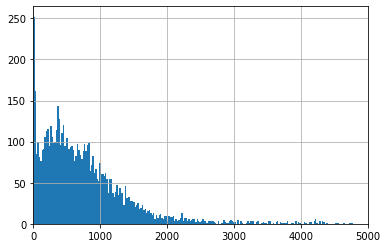

In [67]:
len_seq=[]
for i in sequences:
  len_seq.append(len(i))
plt.hist(len_seq,bins=1000)
plt.xlim(0,5000)
plt.grid(True)
plt.show()

In [25]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
padded=pad_sequences(sequences,padding="post",maxlen=2500,truncating="post")

In [27]:
labels=[]
for i in np.array(data["label"]):
  if i=="FAKE":
    labels.append(0.0)
  else:
    labels.append(1.0)

In [40]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(padded,labels)

In [41]:
x_test=x_test.tolist()
x_train=x_train.tolist()

In [44]:
model=tf.keras.Sequential([
  tf.keras.layers.Embedding(vocab_size,embedding_dim,input_length=max_length),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(6,activation="relu"),
  tf.keras.layers.Dense(1,activation="relu")                        
])
model.compile(loss="binary_crossentropy",optimizer="adam",metrics=["accuracy"])
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 2500, 20)          126700    
_________________________________________________________________
flatten_3 (Flatten)          (None, 50000)             0         
_________________________________________________________________
dense_6 (Dense)              (None, 6)                 300006    
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 7         
Total params: 426,713
Trainable params: 426,713
Non-trainable params: 0
_________________________________________________________________


In [45]:
history=model.fit(x_train,y_train,epochs=10,validation_data=(x_test,y_test))

Epoch 1/10
149/149 [==============================] - 16s 102ms/step - loss: 7.5368 - accuracy: 0.4911 - val_loss: 0.6572 - val_accuracy: 0.5189
Epoch 2/10
149/149 [==============================] - 3s 19ms/step - loss: 0.6007 - accuracy: 0.6940 - val_loss: 0.5150 - val_accuracy: 0.7986
Epoch 3/10
149/149 [==============================] - 3s 19ms/step - loss: 0.4305 - accuracy: 0.8198 - val_loss: 0.3066 - val_accuracy: 0.8845
Epoch 4/10
149/149 [==============================] - 3s 19ms/step - loss: 0.1723 - accuracy: 0.9374 - val_loss: 0.2346 - val_accuracy: 0.9299
Epoch 5/10
149/149 [==============================] - 3s 19ms/step - loss: 0.0733 - accuracy: 0.9859 - val_loss: 0.2394 - val_accuracy: 0.9356
Epoch 6/10
149/149 [==============================] - 3s 19ms/step - loss: 0.0464 - accuracy: 0.9941 - val_loss: 0.2601 - val_accuracy: 0.9451
Epoch 7/10
149/149 [==============================] - 3s 19ms/step - loss: 0.0407 - accuracy: 0.9936 - val_loss: 0.2673 - val_accuracy: 0.94

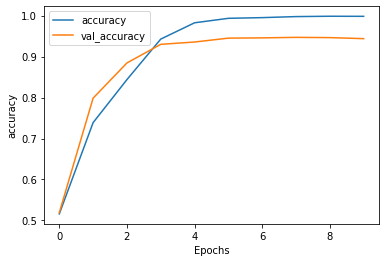

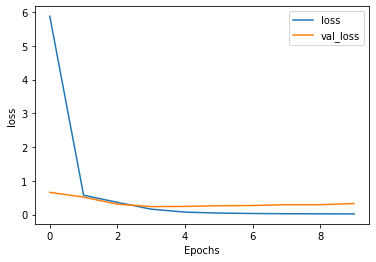

In [46]:
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")


In [49]:
e=model.layers[0]
weights=e.get_weights()[0]
print(weights.shape)

(6335, 20)


In [50]:
reverse_word_index=dict([(v,k) for (k,v) in word_index.items()])
def decode_review(text):
  return " ".join([reverse_word_index.get(i,"?") for i in text])

In [51]:
import io
out_v=io.open("vecs2.tsv","w",encoding="utf-8")
out_m=io.open("meta2.tsv","w",encoding="utf-8")
for word_num in range(1,vocab_size):
  word=reverse_word_index[word_num]
  embeddings=weights[word_num]
  out_m.write(word+"\n")
  out_v.write("\t".join([str(x) for x in embeddings])+"\n")
out_v.close()
out_m.close()

In [53]:
from google.colab import files
files.download("vecs2.tsv")
files.download("meta2.tsv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [59]:
embedding_dim=64
model1=tf.keras.Sequential([
  tf.keras.layers.Embedding(vocab_size, embedding_dim),
  tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
  tf.keras.layers.Dense(6,activation="relu"),
  tf.keras.layers.Dense(1,activation="relu")
])

In [63]:
model1.compile(loss="binary_crossentropy",optimizer="adam",metrics=["accuracy"])

In [64]:
history1=model1.fit(x_train,y_train,epochs=10,validation_data=(x_test,y_test))

Epoch 1/10
149/149 [==============================] - 486s 3s/step - loss: 0.9602 - accuracy: 0.5834 - val_loss: 0.3351 - val_accuracy: 0.8977
Epoch 2/10
149/149 [==============================] - 470s 3s/step - loss: 0.2876 - accuracy: 0.9241 - val_loss: 0.3321 - val_accuracy: 0.9066
Epoch 3/10
149/149 [==============================] - 473s 3s/step - loss: 0.1233 - accuracy: 0.9712 - val_loss: 0.3663 - val_accuracy: 0.8946
Epoch 4/10
149/149 [==============================] - 471s 3s/step - loss: 0.0644 - accuracy: 0.9897 - val_loss: 0.5247 - val_accuracy: 0.9122
Epoch 5/10
149/149 [==============================] - 477s 3s/step - loss: 0.0452 - accuracy: 0.9964 - val_loss: 0.6580 - val_accuracy: 0.9141
Epoch 6/10
149/149 [==============================] - 477s 3s/step - loss: 0.0421 - accuracy: 0.9967 - val_loss: 0.7015 - val_accuracy: 0.9116
Epoch 7/10
149/149 [==============================] - 477s 3s/step - loss: 0.0453 - accuracy: 0.9971 - val_loss: 0.6686 - val_accuracy: 0.9122